# **Support Vector Regression**

Name: Seanrei Ethan M. Valdeabella

Date: January 14, 2025

In [ ]:
#@title # 1. Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#@title 2. Importing the Dataset
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1:].values  # This achieves the same results as the code below.
# y = dataset.iloc[:, -1].values
# y = y.reshape(len(y), 1)  # Turns "y" into a 2D array

print(f"X:\n{X}\n")
print(f"y:\n{y}\n")

X:
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

y:
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]



In [ ]:
#@title 3. Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(f"X:\n{X}\n")
print(f"y:\n{y}\n")


X:
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]

y:
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]



In [ ]:
#@title 4. Training the SVR Model on the Whole Datase
#@markdown Take note that the regressor is trained on the scaled features, and not the original scale

from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
#@title 5. Predicting a New Result

#  Reversing the transformed "y" back to its original scale
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

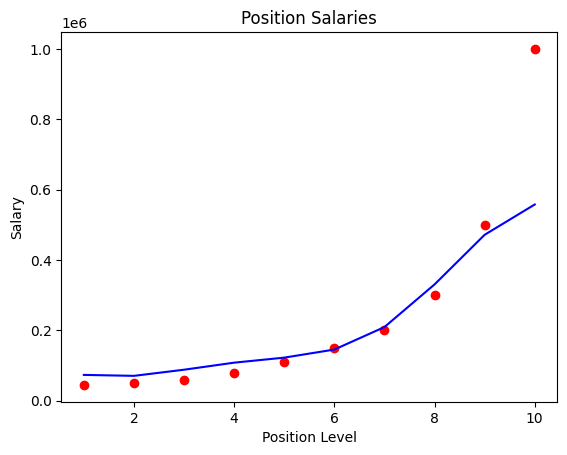

In [ ]:
#@title 6. Visualizing the SVR Results

plt.title("Position Salaries")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color="blue")
plt.show()

<ipython-input-145-656c259c9696>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_inversed), max(X_inversed), 0.1)


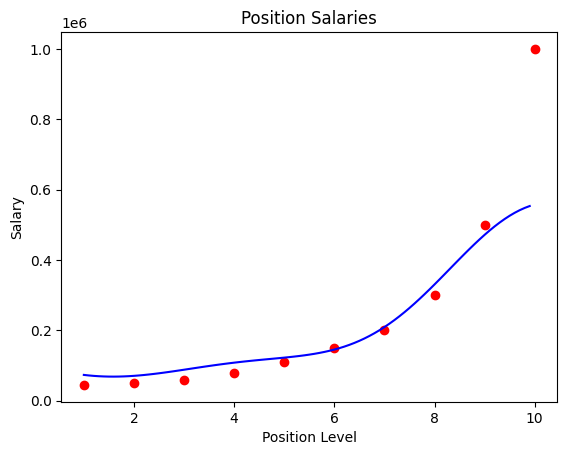

In [ ]:
#@title 7. Visualizing the SVR Results (for higher resolution and smoother curve)
X_inversed = sc_X.inverse_transform(X)
X_grid = np.arange(min(X_inversed), max(X_inversed), 0.1)
X_grid = X_grid.reshape((len(X_grid)), 1)

plt.title("Position Salaries")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color="blue")
plt.show()